In [1]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

In [2]:
#Import Data
df=pd.read_excel('Data_Train.xlsx')

In [3]:
#Check head
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Check unique values for Airline
df['Airline'].nunique()

12

In [6]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [7]:
df['Month_of_Journey']=df['Date_of_Journey'].dt.month

In [8]:
le=LabelEncoder()

In [9]:
df['Airline']=le.fit_transform(df['Airline'])

In [10]:
df=df.drop('Date_of_Journey',axis=1)

In [11]:
df['Source'].nunique()

5

In [12]:
df['Source']=le.fit_transform(df['Source'])

In [13]:
df['Destination'].nunique()

6

In [14]:
df['Destination']=le.fit_transform(df['Destination'])

In [15]:
df=df.dropna()
#Drop one row which has null Route

In [16]:
def conv_time(x):
    hr=0
    m=0
    if 'h' in x and 'm' not in x:
        hr=int(x[:x.find('h')].strip())
    elif 'm' in x and 'h' in x:
        m=int(x[x.find('h')+1:x.find('m')].strip())
        hr=int(x[:x.find('h')].strip())
#     elif 'm' in x and 'h' not in x:
#         m=int(x[:,x.find('m')].strip())
    tot=hr+m
    return tot

In [17]:
#With the help of above function we have added Duration_tot in which we have converted time in minutes
df['Duration_tot']=df.apply(lambda x:conv_time(x['Duration']),axis=1)
#Hence we will drop duration column

In [18]:
#Drop unnecessary rows
df=df.drop('Duration',axis=1)

In [19]:
df=df.drop('Route',axis=1)

In [20]:
df=df.drop('Dep_Time',axis=1)

In [21]:
df=df.drop('Arrival_Time',axis=1)

In [22]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [23]:
df[df['Total_Stops']=='4 stops']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month_of_Journey,Duration_tot
9182,1,0,5,4 stops,Change airports,17686,1,59


In [24]:
df=df.drop(index=9182,axis=0)

In [25]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
Name: Total_Stops, dtype: int64

In [26]:
df['Total_Stops']=le.fit_transform(df['Total_Stops'])

In [27]:
df['Additional_Info']=le.fit_transform(df['Additional_Info'])

In [146]:
# df=df.drop('Additional_Info',axis=1)

In [28]:
df.shape

(10681, 8)

In [148]:
# zs=zscore(df)
# df=df[(zs<3).all(axis=1)]
#Model is performing well without removing outliers

In [29]:
df.shape

(10681, 8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10681 non-null  int64
 1   Source            10681 non-null  int64
 2   Destination       10681 non-null  int64
 3   Total_Stops       10681 non-null  int64
 4   Additional_Info   10681 non-null  int64
 5   Price             10681 non-null  int64
 6   Month_of_Journey  10681 non-null  int64
 7   Duration_tot      10681 non-null  int64
dtypes: int64(8)
memory usage: 751.0 KB


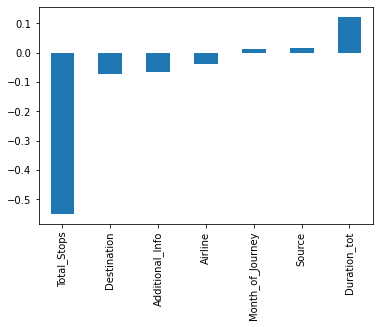

In [31]:
df.corr()['Price'].drop('Price').sort_values().plot(kind='bar')

In [32]:
df.skew()

Airline             0.731020
Source             -0.424206
Destination         1.244365
Total_Stops         0.558809
Additional_Info    -1.780299
Price               1.813122
Month_of_Journey    0.629631
Duration_tot        0.092024
dtype: float64

In [33]:
for x in df.columns.drop('Price'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=np.log1p(df.loc[:,x])

In [34]:
scale=MinMaxScaler()

In [35]:
X=df.drop('Price',axis=1)
y=df['Price']

In [36]:
X=scale.fit_transform(X)

In [37]:
def model_sel(mod):
    maxscore=0
    maxstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod()
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxstate=x
    print("Max Score is {} at max state {}".format(maxscore,maxstate))

In [38]:
model_sel(LinearRegression)

Max Score is 0.296560492420888 at max state 42


In [39]:
model_sel(Ridge)

Max Score is 0.296624592785908 at max state 42


In [40]:
model_sel(Lasso)

Max Score is 0.29692317587656825 at max state 42


In [41]:
model_sel(ElasticNet)

Max Score is 0.14349092200020586 at max state 93


In [42]:
model_sel(KNeighborsRegressor)

Max Score is 0.7320913416836772 at max state 62


In [43]:
model_sel(DecisionTreeRegressor)

Max Score is 0.721564684447729 at max state 46


In [44]:
model_sel(RandomForestRegressor)

Max Score is 0.7715495110545827 at max state 44


In [45]:
model_sel(SVR)

Max Score is 0.07990358931957275 at max state 102


In [46]:
model_sel(AdaBoostRegressor)

Max Score is 0.5305006252755339 at max state 86


In [167]:
#As we can see from the above scores RandomForestRegressor is performing good enoigh
#Hence we will hypertune it's parameter

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [48]:
param={'n_estimators':[100,130,150,1700,190,200,210,250,270,290,310,250,270,410]}
gscv=GridSearchCV(RandomForestRegressor(),param)

In [49]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 130, 150, 1700, 190, 200, 210,
                                          250, 270, 290, 310, 250, 270, 410]})

In [50]:
gscv.best_params_

{'n_estimators': 150}

In [51]:
rf=RandomForestRegressor(n_estimators=150)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [52]:
cross_val_score(rf,X_train,y_train,cv=4).mean()

0.6953476433691503

In [53]:
print("R2 score is {}".format(r2_score(y_test,predict)))
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print("MSE score is {}".format(mean_squared_error(y_test,predict)))

R2 score is 0.7672105569917241
MAE score is 1305.5192535164763
MSE score is 4924666.6681027105


In [54]:
#Save model
joblib.dump(rf,'Flight Prediction RF.obj')

['Flight Prediction RF.obj']

In [55]:
#Use this model on test data set
df_test=pd.read_excel('Test_set.xlsx')

In [57]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [60]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])

In [61]:
df_test['Month_of_Journey']=df_test['Date_of_Journey'].dt.month

In [62]:
df_test=df_test.drop('Date_of_Journey',axis=1)

In [63]:
df_test['Airline']=le.fit_transform(df_test['Airline'])

In [64]:
df_test['Source']=le.fit_transform(df_test['Source'])

In [65]:
df_test['Destination']=le.fit_transform(df_test['Destination'])

In [66]:
#With the help of above function we have added Duration_tot in which we have converted time in minutes
df_test['Duration_tot']=df_test.apply(lambda x:conv_time(x['Duration']),axis=1)
#Hence we will drop duration column

In [67]:
#Drop unnecessary rows
df_test=df_test.drop('Duration',axis=1)

In [68]:
df_test=df_test.drop('Route',axis=1)

In [69]:
df_test=df_test.drop('Dep_Time',axis=1)

In [70]:
df_test=df_test.drop('Arrival_Time',axis=1)

In [71]:
df_test['Total_Stops']=le.fit_transform(df_test['Total_Stops'])

In [72]:
df_test['Additional_Info']=le.fit_transform(df_test['Additional_Info'])

In [74]:
for x in df_test.columns:
    if abs(df_test.loc[:,x].skew())>0.55:
        df_test.loc[:,x]=np.log1p(df_test.loc[:,x])

In [75]:
predict_test=rf.predict(df_test)

In [76]:
#Save model
joblib.dump(rf,'Flight Prediction RF.obj')

['Flight Prediction RF.obj']